# 0.0 IMPORTS

## packages

In [1]:
import os, pickle, datetime
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy.stats as ss


from sklearn.preprocessing              import RobustScaler,MinMaxScaler
from sklearn.base                       import BaseEstimator, TransformerMixin
from sklearn.preprocessing              import LabelEncoder
from IPython.display                    import Image
from sklearn.linear_model               import LinearRegression, Lasso
from sklearn.ensemble                   import RandomForestRegressor
from boruta                             import BorutaPy


pd.options.display.max_columns = 500 # this will set limit of columns to 500
%matplotlib inline
os.getcwd()

'p:\\Python\\GitHub\\insurance_cross'

## helper classes

## helper funcions 

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [30, 16]
    plt.rcParams['font.size'] = 24
    
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## data import

In [3]:
df0=pd.read_csv(r"data/train.csv")
test=pd.read_csv(r"data/test.csv")
df0.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1


# metadata

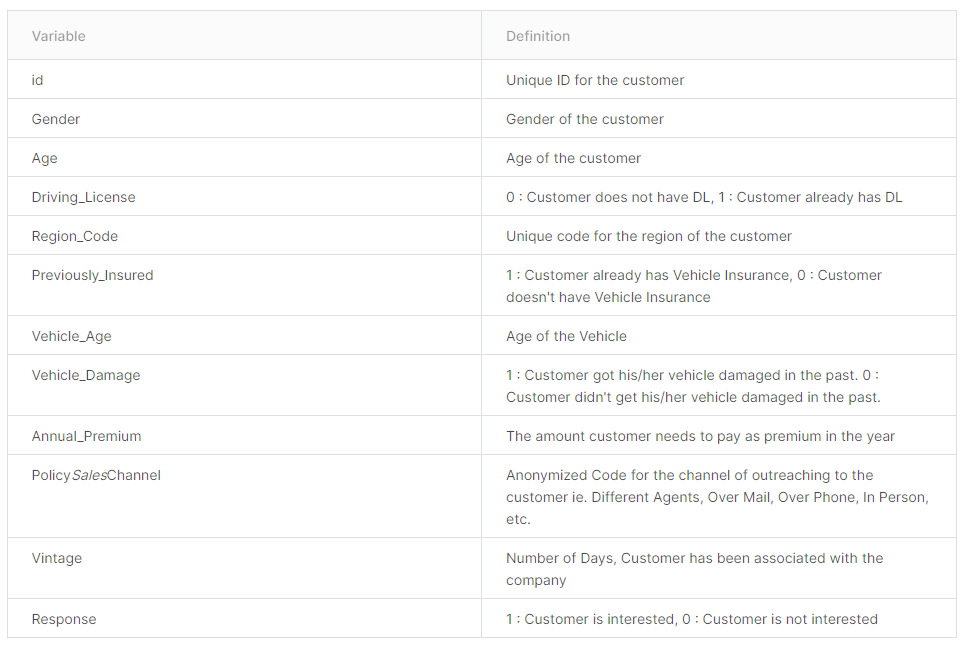

In [4]:
Image('img/metadata.png')

# 1.0 DATA DESCRIPTION

## 1.1 rename columns

In [5]:
df1=df0.copy()
df1.columns=df1.columns.str.lower()
df1.head(1)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1


## 1.2 data dimensions

In [6]:
df1.shape

(381109, 12)

## 1.3 data types

In [7]:
df1.dtypes.sort_values()

id                        int64
age                       int64
driving_license           int64
previously_insured        int64
vintage                   int64
response                  int64
region_code             float64
annual_premium          float64
policy_sales_channel    float64
gender                   object
vehicle_age              object
vehicle_damage           object
dtype: object

In [8]:
#convert categoric features (region_code, policy_sales_channel) to object:
for i in ['region_code','policy_sales_channel']:
    df1[i]=df1[i].astype('object')

## 1.4 check NA

In [9]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5 fillout NA

## 1.6 descriptive statistics for numeric attributes

In [10]:
num_cols=df1.select_dtypes(include=['int64','float64'])
num_cols.agg(["mean","median","std","min","max","skew","kurtosis"]).T


,mean,median,std,min,max,skew,kurtosis
id,190555.000000,190555.0,110016.836208,1.0,381109.0,9.443274e-16,-1.200000
age,38.822584,36.0,15.511611,20.0,85.0,6.725390e-01,-0.565655
driving_license,0.997869,1.0,0.046110,0.0,1.0,-2.159518e+01,464.354302
previously_insured,0.458210,0.0,0.498251,0.0,1.0,1.677471e-01,-1.971871
annual_premium,30564.389581,31669.0,17213.155057,2630.0,540165.0,1.766087e+00,34.004569
vintage,154.347397,154.0,83.671304,10.0,299.0,3.029517e-03,-1.200688
response,0.122563,0.0,0.327936,0.0,1.0,2.301906e+00,3.298788


# 2.0 FEATURE ENGINEERING

## 2.1 hypotesis mapping

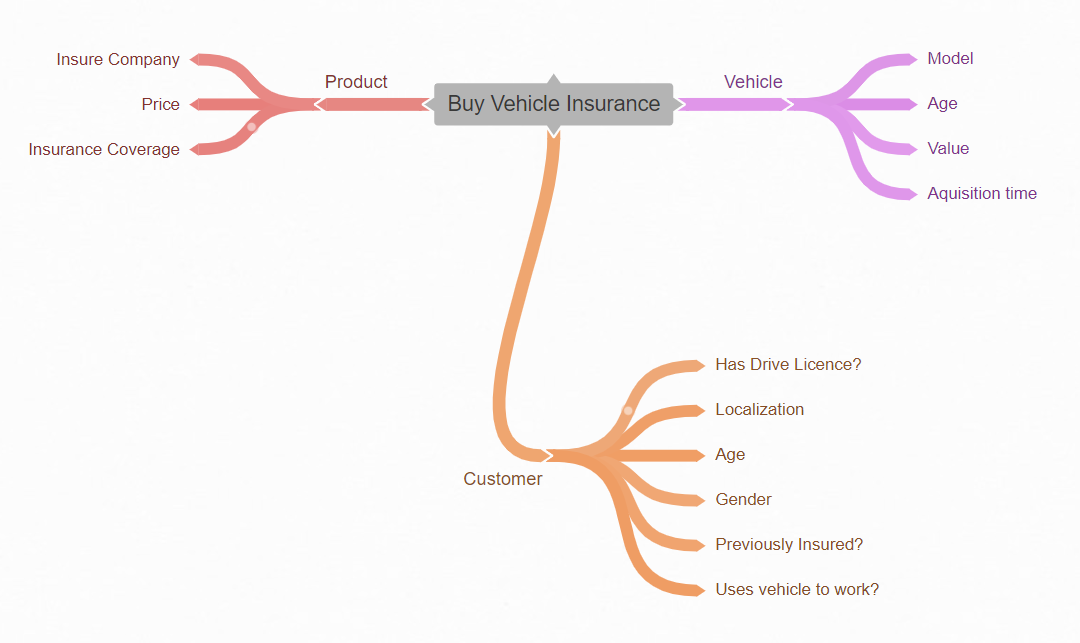

In [11]:
Image('img/mindmap.png')

## 2.2 hypotesis list

In [12]:
df2=df1.copy()

## 2.3 feature creation

# 3.0 FEATURE FILTERING

In [13]:
df3=df2.copy()

## 3.1 row filtering

## 3.2 cols filtering

# 4.0 EXPLORATORY DATA ANALYSIS

In [14]:
df4=df3.copy()

## 4.1 univariate analysis

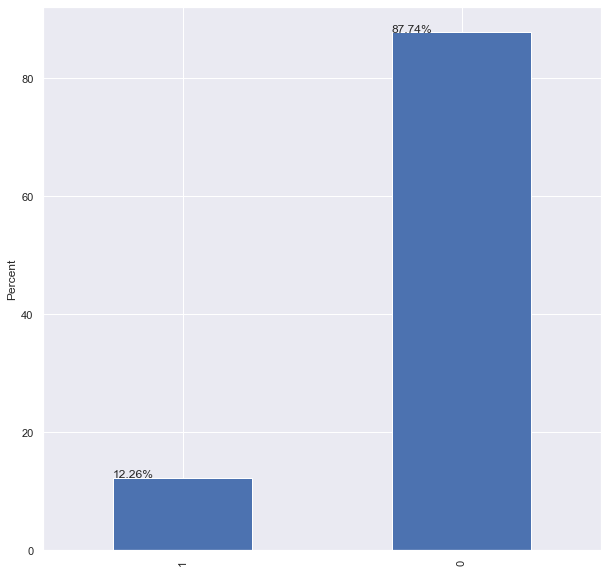

In [16]:
percentage = lambda i: len(i) / float(len(df4['response'])) * 100

ax = (pd.Series(df4['response']).value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")

for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)

plt.gcf().set_size_inches(10,10)
plt.show()


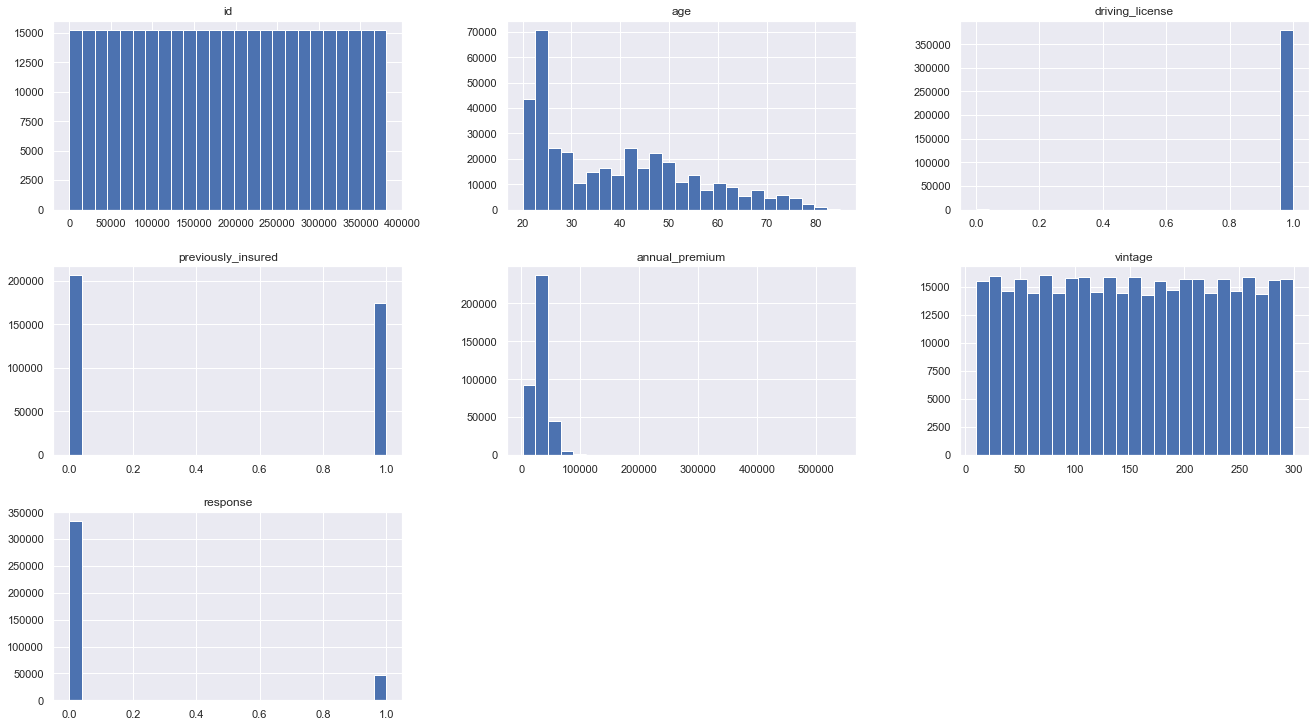

In [17]:
df4.hist(bins=25)
fig = plt.gcf()
fig.set_size_inches(22.5, 12.5)

In [18]:
df4['policy_sales_channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
55.0       1264
155.0      1234
11.0       1203
1.0        1074
52.0       1055
125.0      1026
15.0        888
29.0        843
12.0        783
120.0       769
24.0        750
31.0        631
14.0        622
153.0       607
61.0        579
3.0         523
16.0        523
60.0        517
4.0         509
158.0       492
23.0        422
22.0        332
150.0       312
10.0        264
19.0        222
136.0       185
147.0       184
109.0       175
145.0       174
9.0         169
18.0        167
91.0        158
116.0       154
37.0        152
21.0        148
139.0       143
128.0       137
42.0        132
59.0        127
138.0       124
131.0       121
127.0       110
140.0       107
113.0       104
119.0       103
44.0        101
135.0       101
54.0    

In [20]:
df4.select_dtypes(include='object').columns

Index(['gender', 'region_code', 'vehicle_age', 'vehicle_damage',
       'policy_sales_channel'],
      dtype='object')

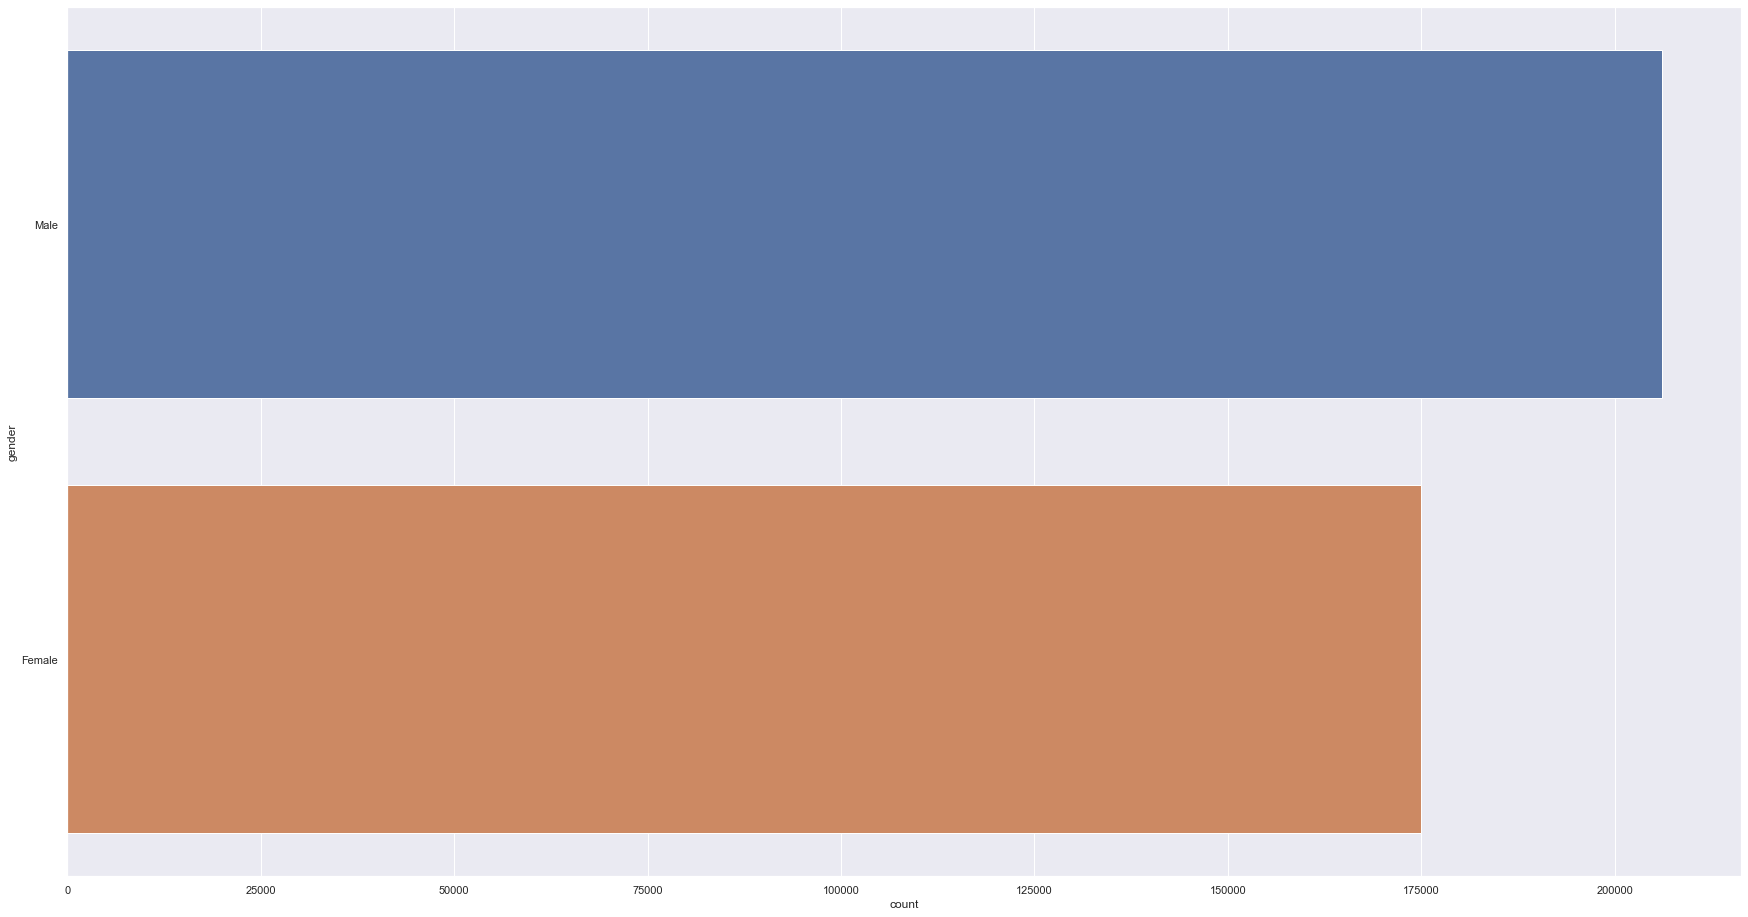

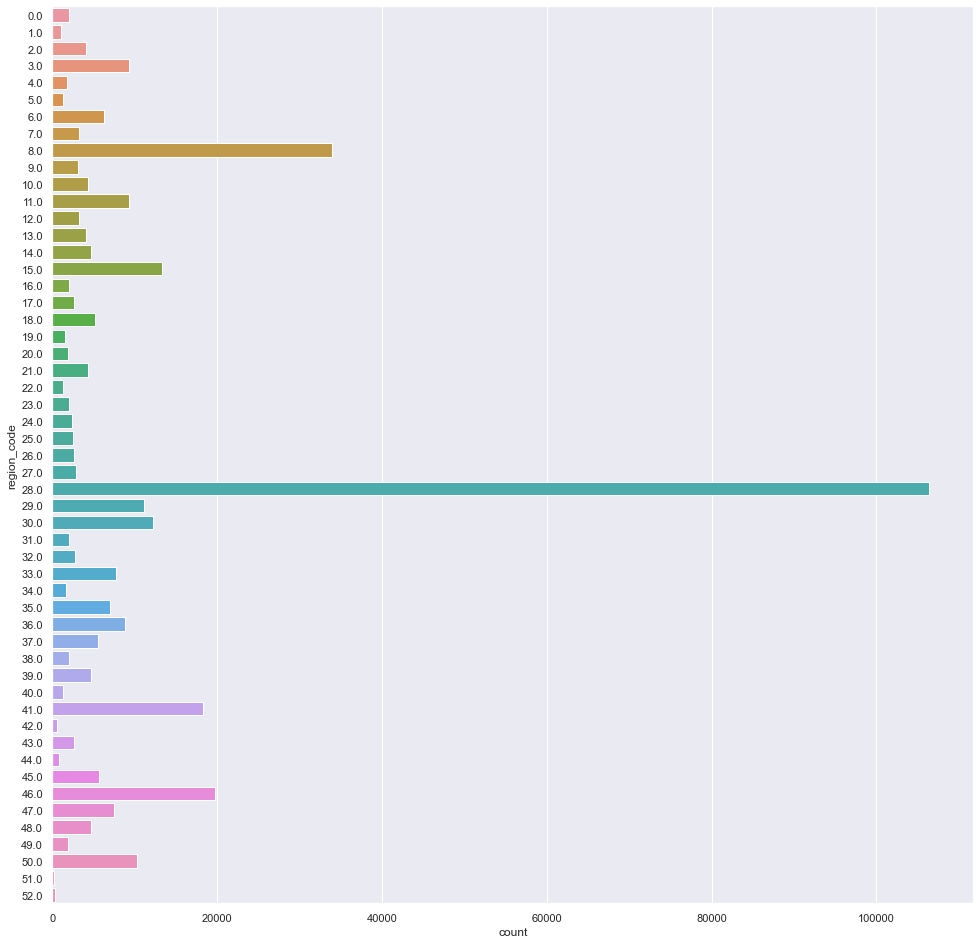

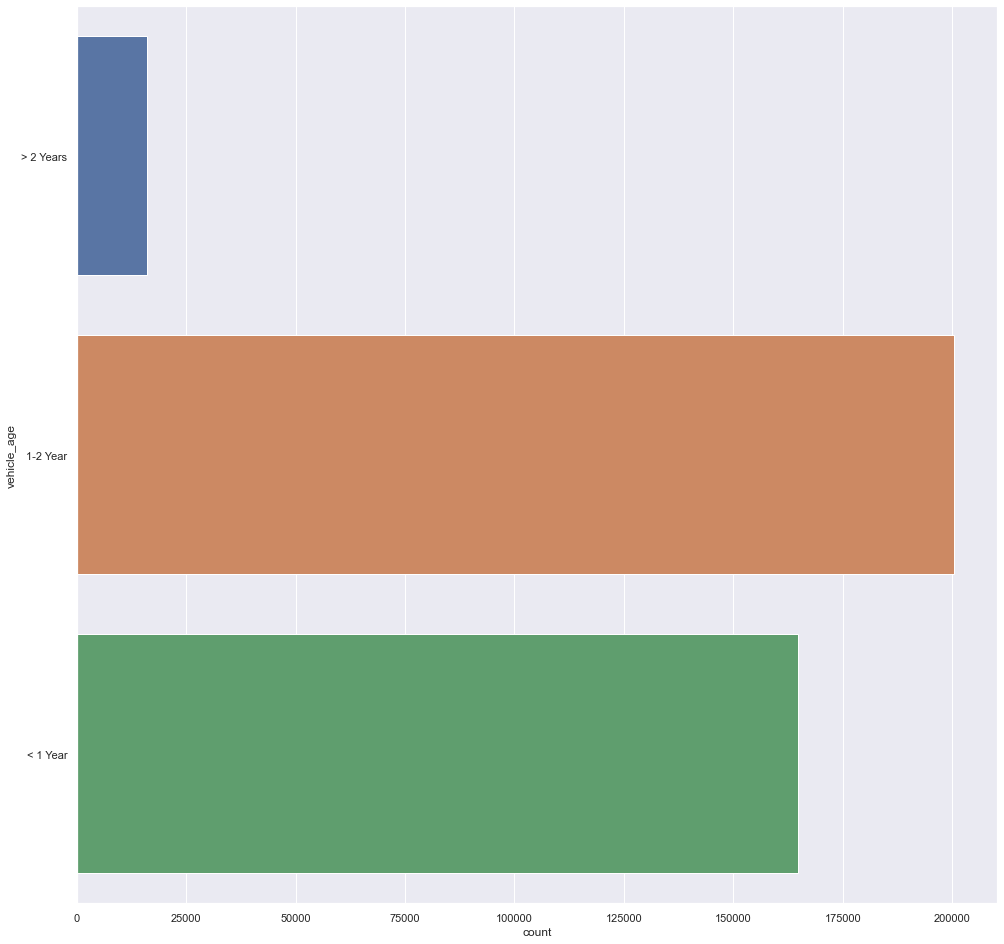

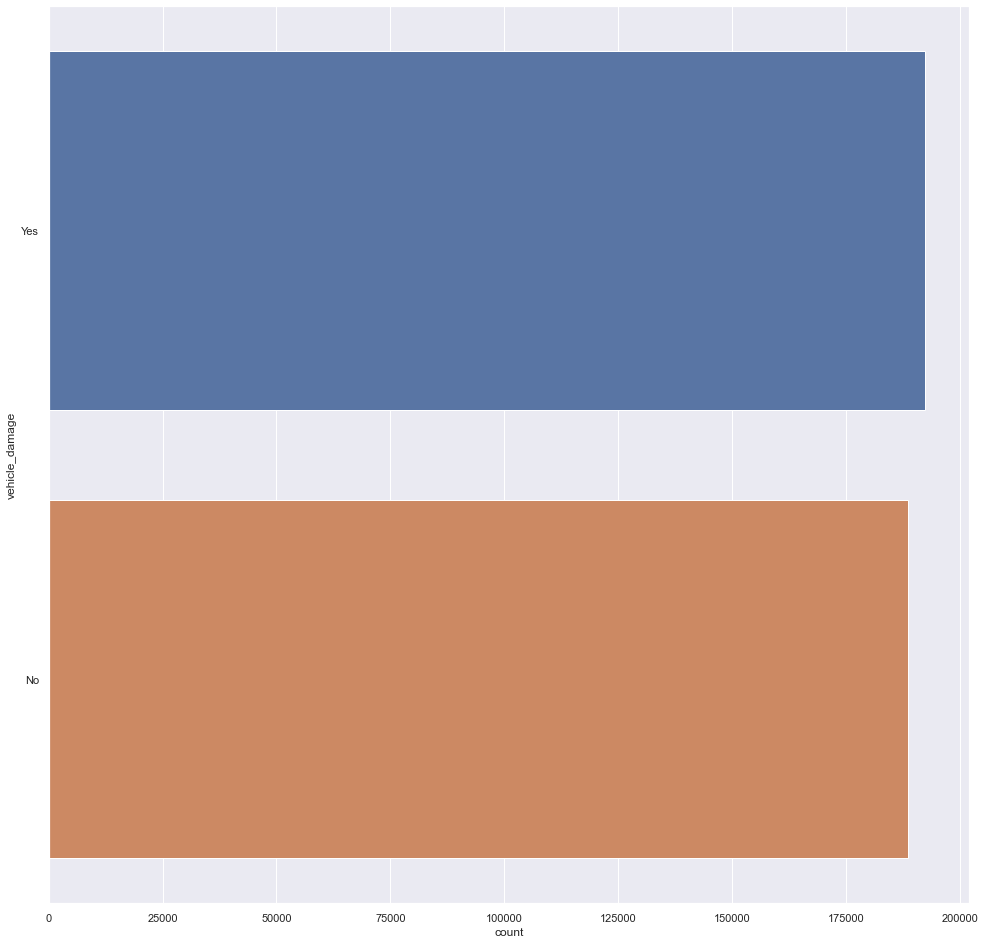

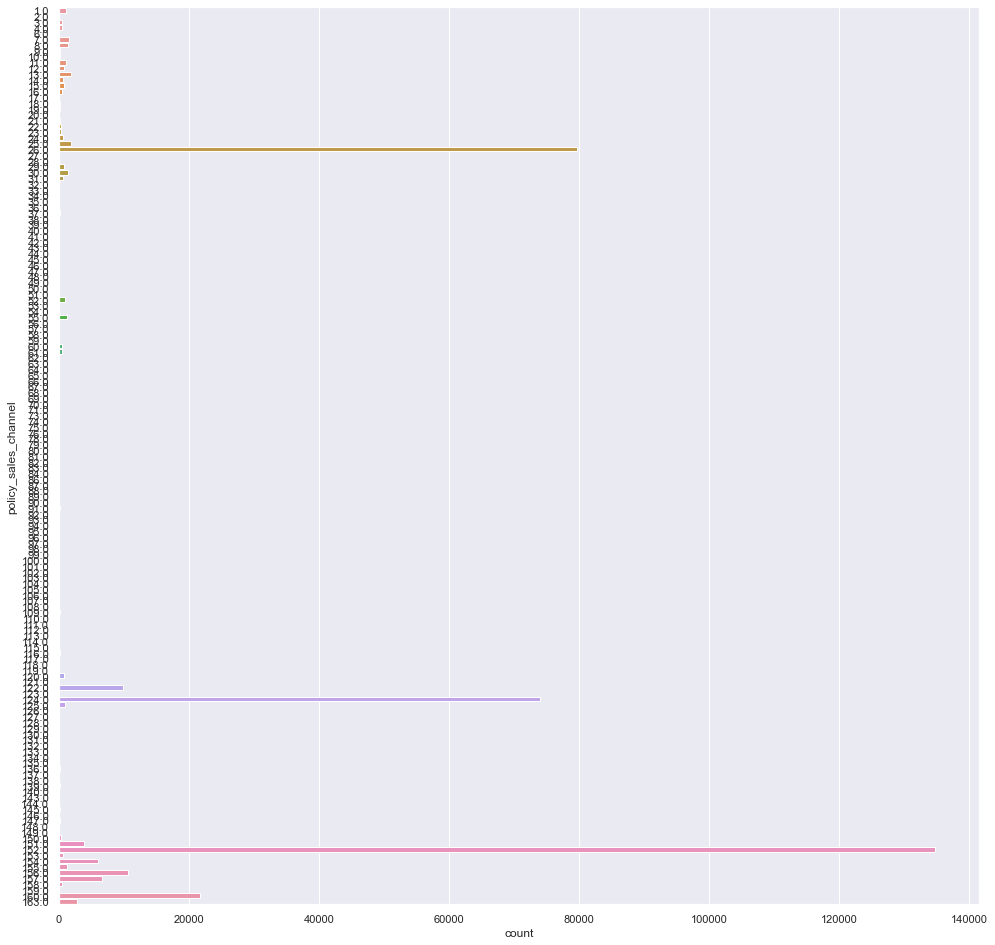

<Figure size 1188x1188 with 0 Axes>

In [36]:
for i in df4.select_dtypes(include='object').columns:
    sns.countplot(y=df4[i])
    plt.show()
    fig = plt.gcf()
    fig.set_size_inches(16.5, 16.5)

## 4.2 bivariate analysis and hypoteses testing

### H1. Customers with HIGH ASSOCIATE TIME with the company buys MORE vehicle insurance.
### **FALSE** There's no relationship between Associate Time and propensity buting vehicle insurance.

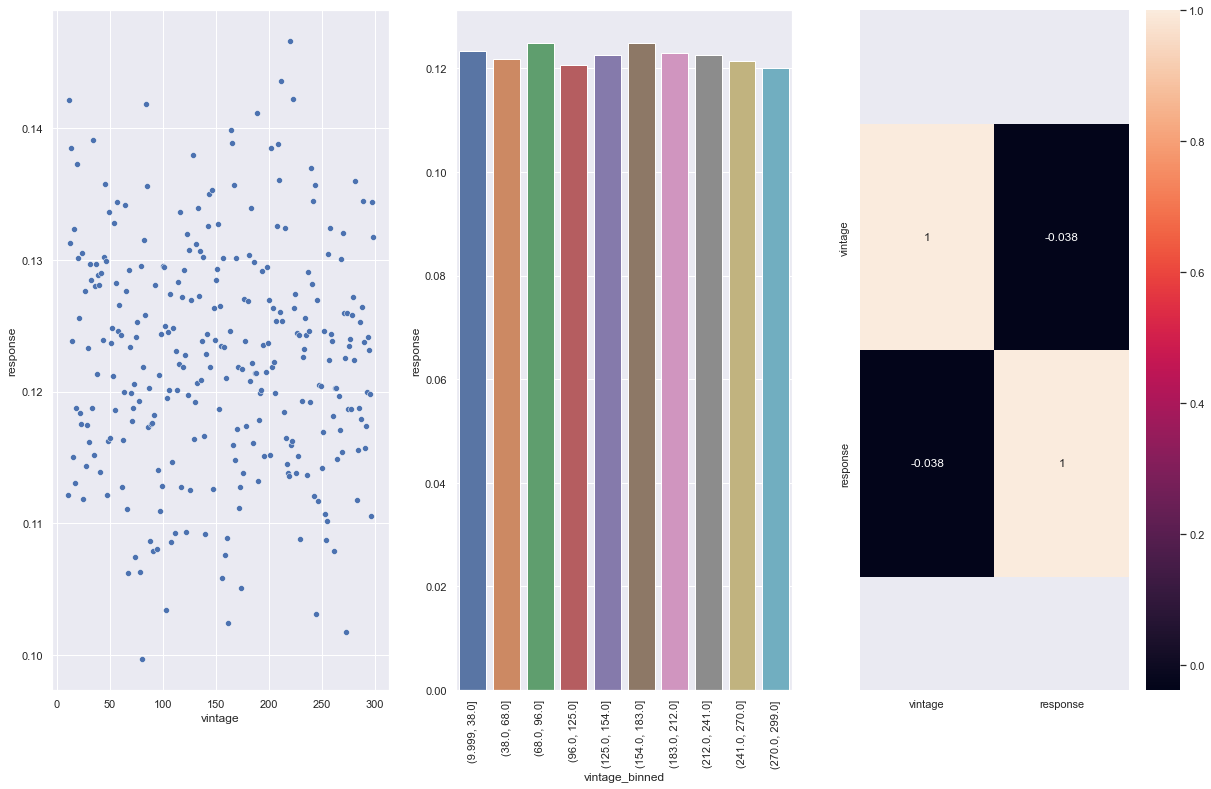

In [54]:
aux1 = df4[['vintage', 'response']].groupby( 'vintage' ).mean().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='vintage', y='response', data=aux1 );

plt.subplot( 1, 3, 2 )
aux1['vintage_binned']=pd.qcut(df4['vintage'],10)
aux2 = aux1[['vintage_binned', 'response']].groupby( 'vintage_binned' ).mean().reset_index()
sns.barplot( x='vintage_binned', y='response', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

fig = plt.gcf()
fig.set_size_inches(20.5, 12.5)

### H2. Previously insured customers buys MORE vehicle insurance.
### **FALSE** Previously insured customers buys LESS vehicle insurance.

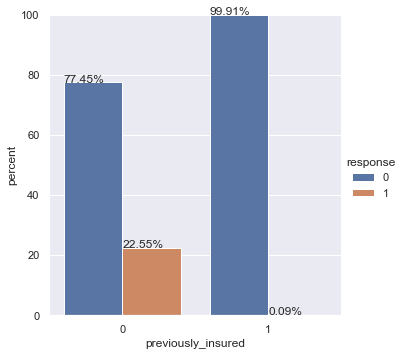

In [47]:
sns.set(rc={'figure.figsize':(10,8)})


aux = df4.groupby('previously_insured')['response'].value_counts(normalize=True)
aux = aux.mul(100)
aux = aux.rename('percent').reset_index()

g = sns.catplot(x='previously_insured',y='percent',hue='response',kind='bar',data=aux)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


### H3. Customers with driver licence buys MORE vehicle insurance.
### **True** Customers with driver licence buys MORE vehicle insurance.

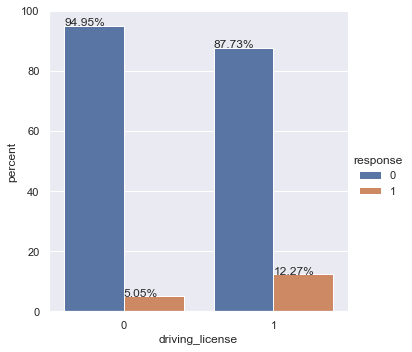

In [56]:
sns.set(rc={'figure.figsize':(10,8)})


aux = df4.groupby('driving_license')['response'].value_counts(normalize=True)
aux = aux.mul(100)
aux = aux.rename('percent').reset_index()

g = sns.catplot(x='driving_license',y='percent',hue='response',kind='bar',data=aux)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### **H4.** OLDERS customers buys MORE vehicle insurance.
### **FALSE** OLDERS customers buys LESS vehicle insurance, but the youngest customers either.

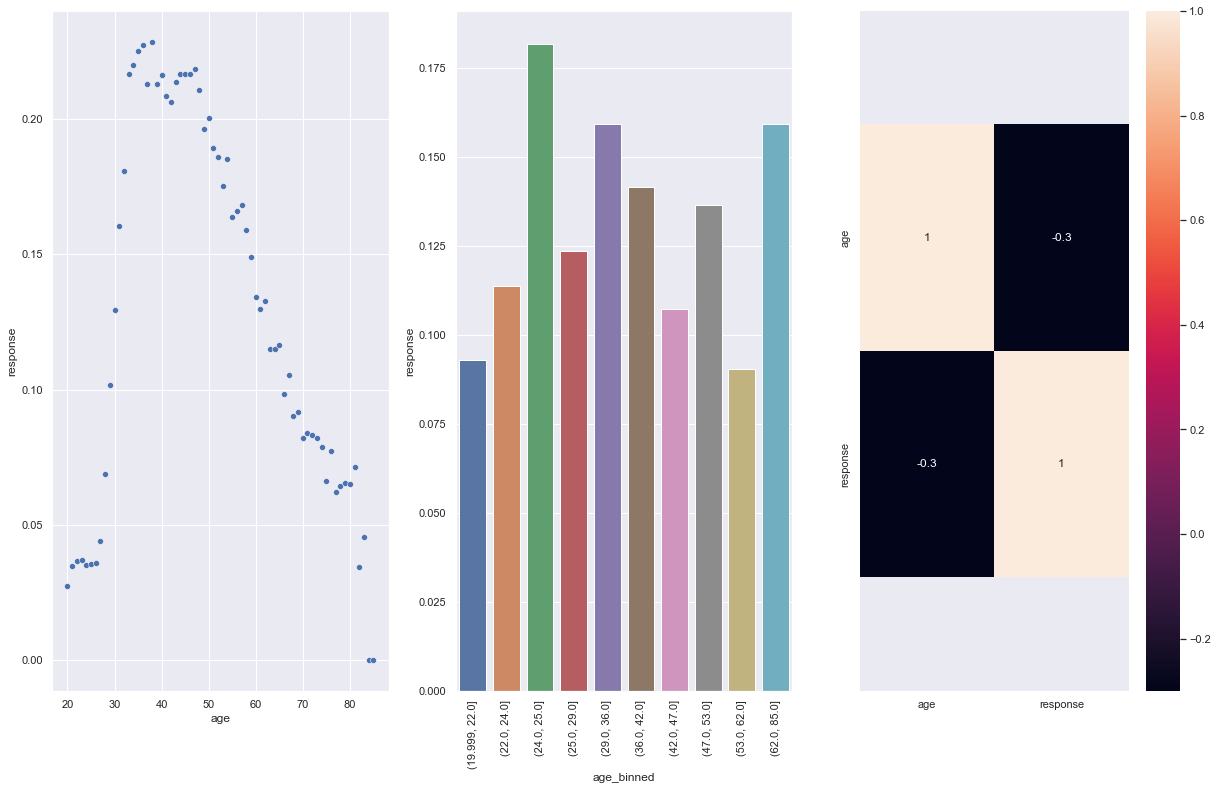

In [58]:
aux1 = df4[['age', 'response']].groupby( 'age' ).mean().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='age', y='response', data=aux1 );

plt.subplot( 1, 3, 2 )
aux1['age_binned']=pd.qcut(df4['age'],10)
aux2 = aux1[['age_binned', 'response']].groupby( 'age_binned' ).mean().reset_index()
sns.barplot( x='age_binned', y='response', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

fig = plt.gcf()
fig.set_size_inches(20.5, 12.5)

### **H5.** There's a difference in propensity to purchase between customers GENDERS.
### **True** MALE customers are slighly more likely to buy vehicle insurance.

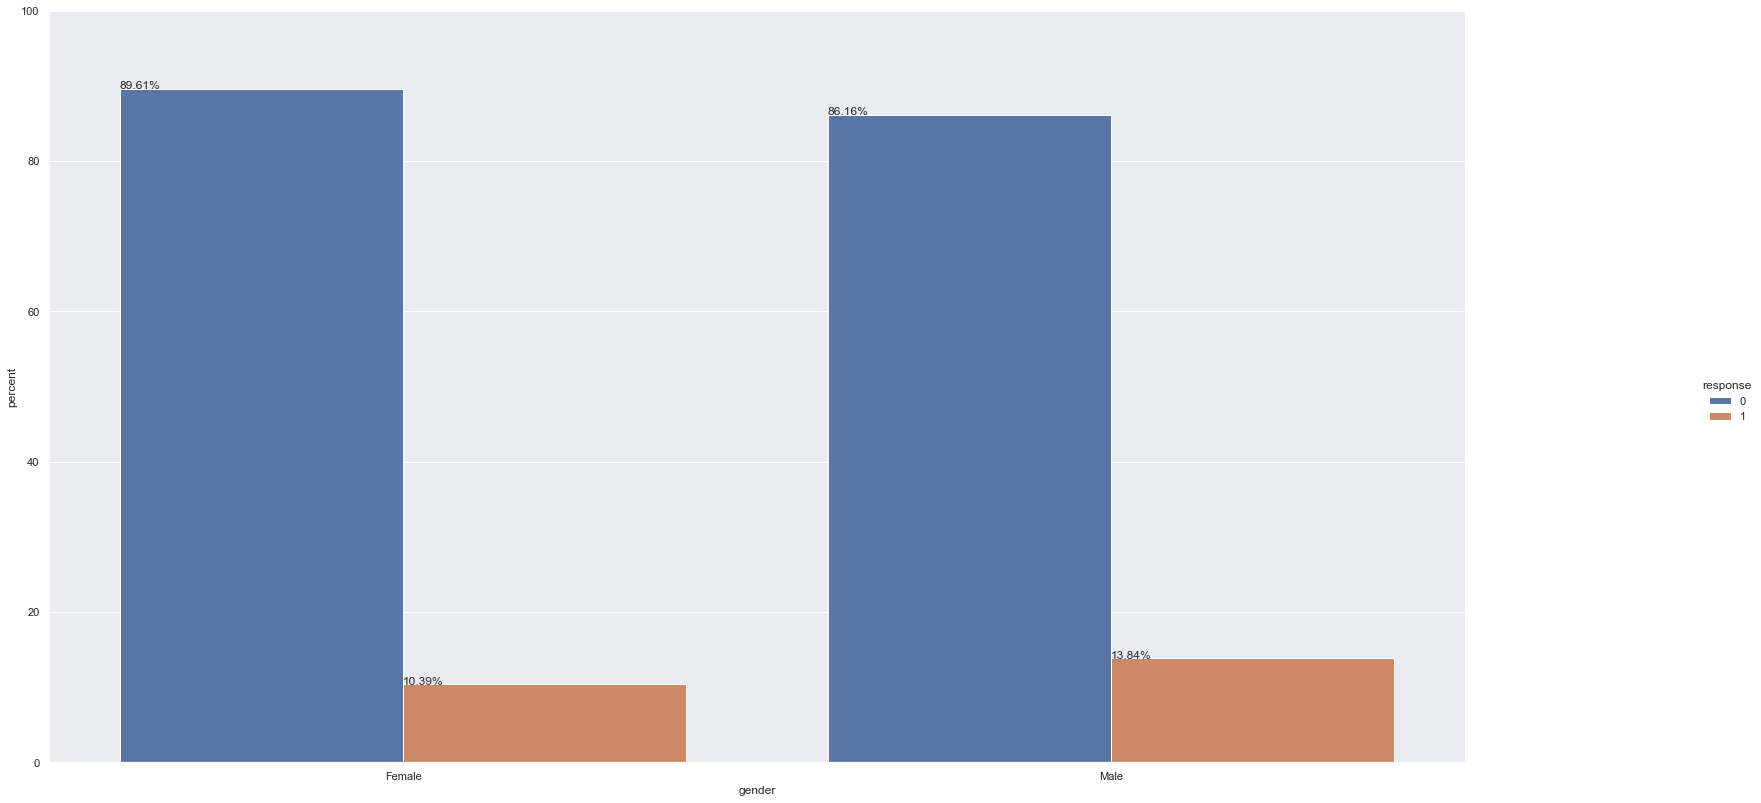

In [60]:
sns.set(rc={'figure.figsize':(10,8)})


aux = df4.groupby('gender')['response'].value_counts(normalize=True)
aux = aux.mul(100)
aux = aux.rename('percent').reset_index()

g = sns.catplot(x='gender',y='percent',hue='response',kind='bar',data=aux)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    fig = plt.gcf()
    fig.set_size_inches(27.5, 12.5)

### <s>**H5.** Stores with more promotions days should sell more </s>
### We haven't the promotions quantity information, therefore we will not test it in this first circle of CRISP-PM.

### <s>**H6.** Stores with more agressive promotion should sell more </s>
### We haven't the promotions discount information, therefore we will not test it in this first circle of CRISP-PM.

### **H7.** Stores with more consecutives promotions should sell more
### **FALSE** Stores with more consecutives promotions sell less

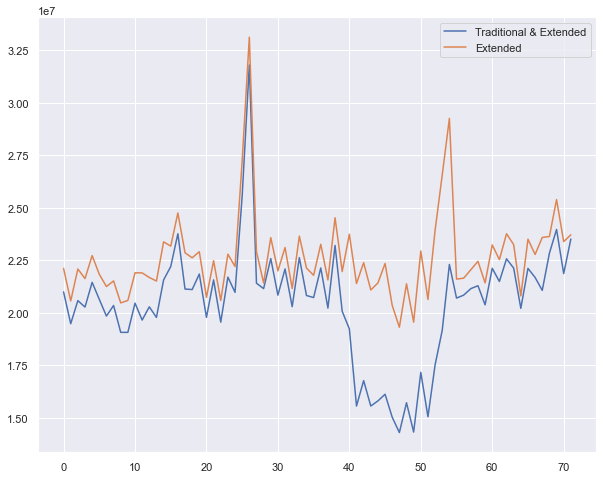

In [36]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Traditional & Extended', 'Extended']);

### H8 Stores open on Christmas Holiday should sell more.

###  **FALSE** Stores open on christmas holiday sell less.

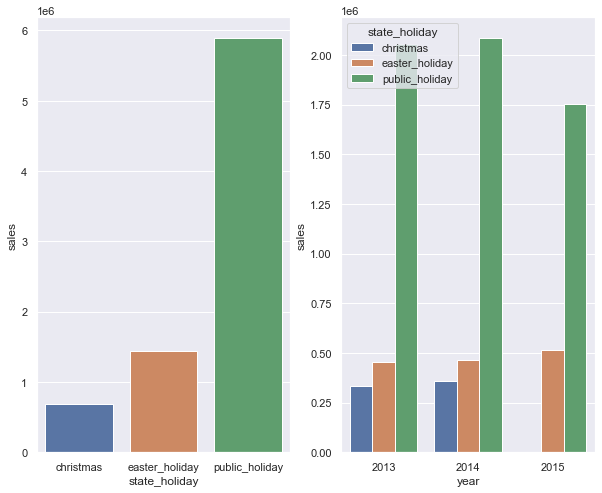

In [37]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 );

plt.subplot( 1, 2, 2 )
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );


### H9. Stores should sell more over the years.
###  **FALSE** Stores sell less over the years

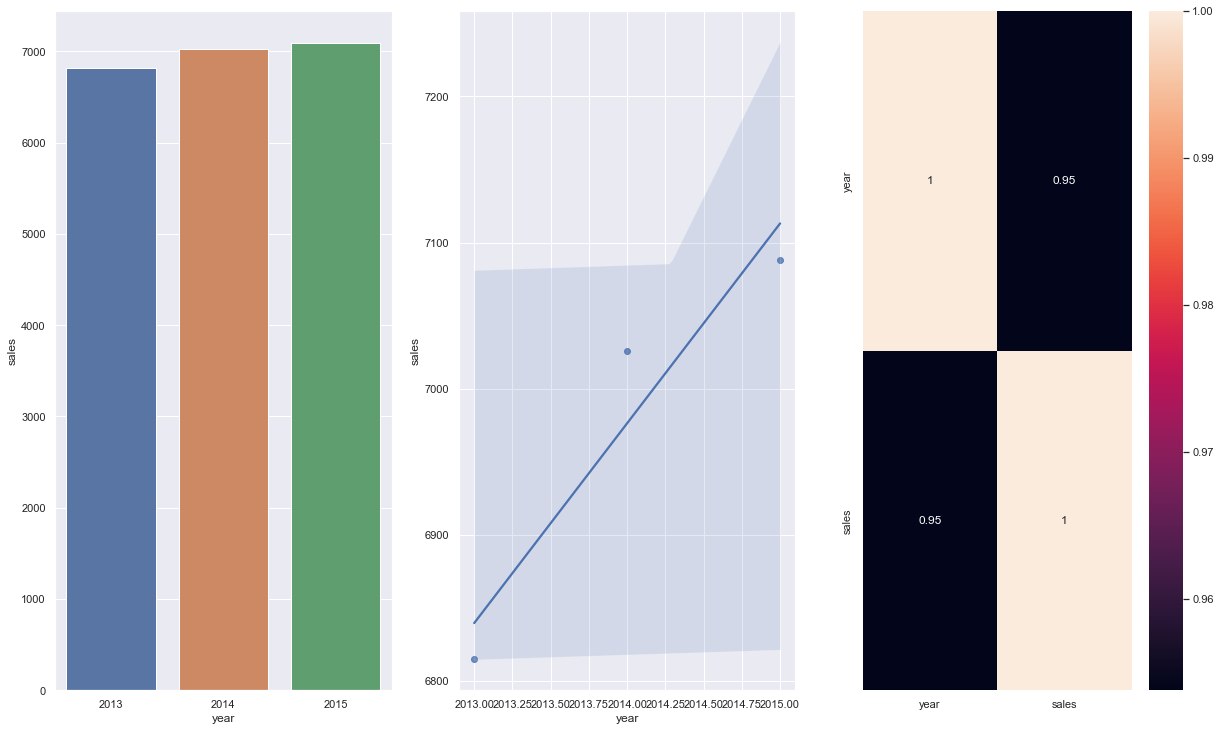

In [51]:
aux1 = df4[['year', 'sales']].groupby( 'year' ).mean().reset_index()

plt.subplot( 1, 3, 1)
sns.barplot( x='year', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='year', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );
plt.gcf().set_size_inches(20.5,12.5)

### H10 Stores should sell more in the second half of the year.
###  **FALSE** Stores sell less in the second half of the year

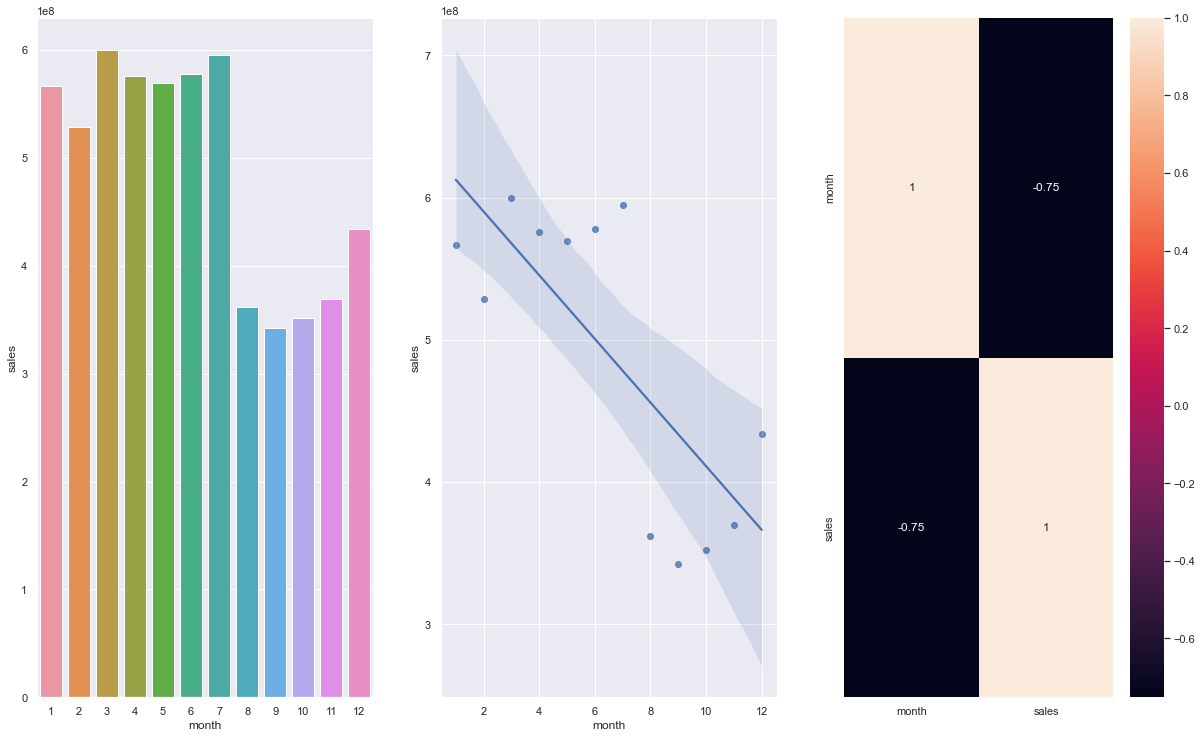

In [39]:
aux1 = df4[['month', 'sales']].groupby( 'month' ).sum().reset_index()

plt.subplot( 1, 3, 1)
sns.barplot( x='month', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='month', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );
plt.gcf().set_size_inches(20.5,12.5)

### H11 Stores should sell more after the 10th of each month.
###  **TRUE** Stores sell more after the 10th of each month.

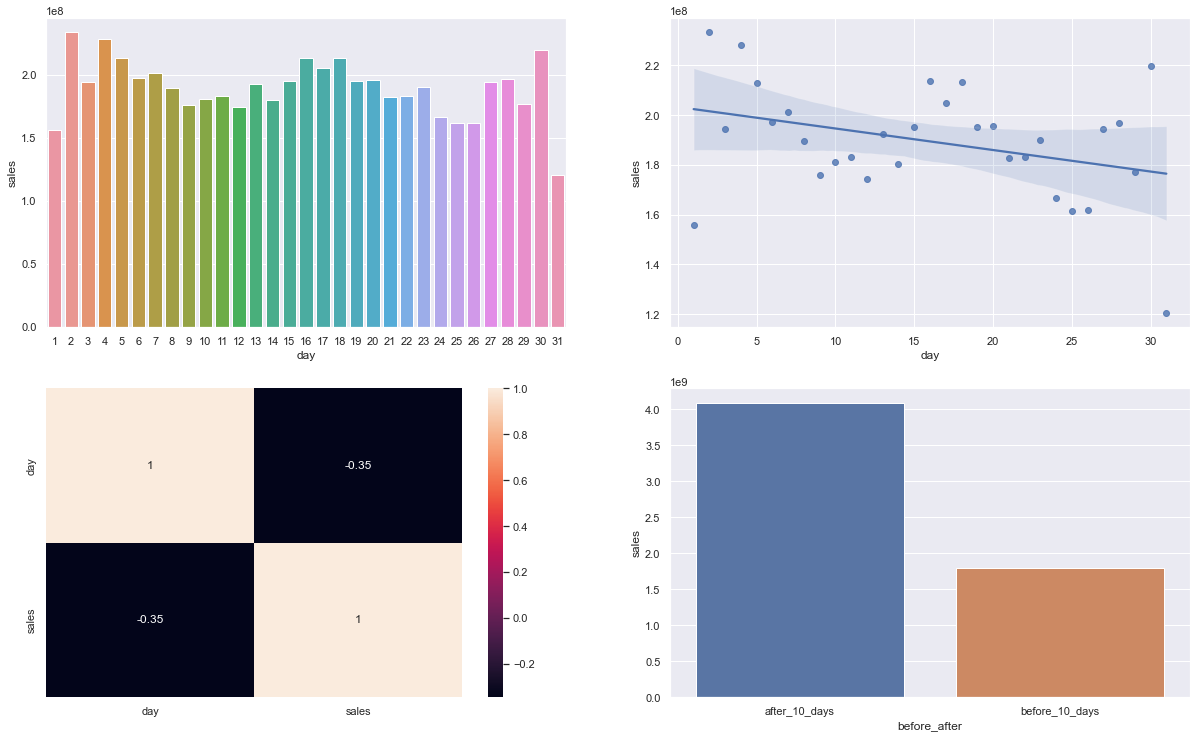

In [40]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()

plt.subplot( 2, 2, 1)
sns.barplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );
plt.gcf().set_size_inches(20.5,12.5)


plt.subplot( 2, 2, 4)
aux1['before_after']= np.where(aux1['day']<10,'before_10_days','after_10_days')
aux2=aux1[['before_after','sales']].groupby( 'before_after').sum().reset_index()
sns.barplot(x='before_after',y='sales',data=aux2);

### H12 Stores should sell less on weekends.
###  **TRUE** Stores sell after on weekeds.

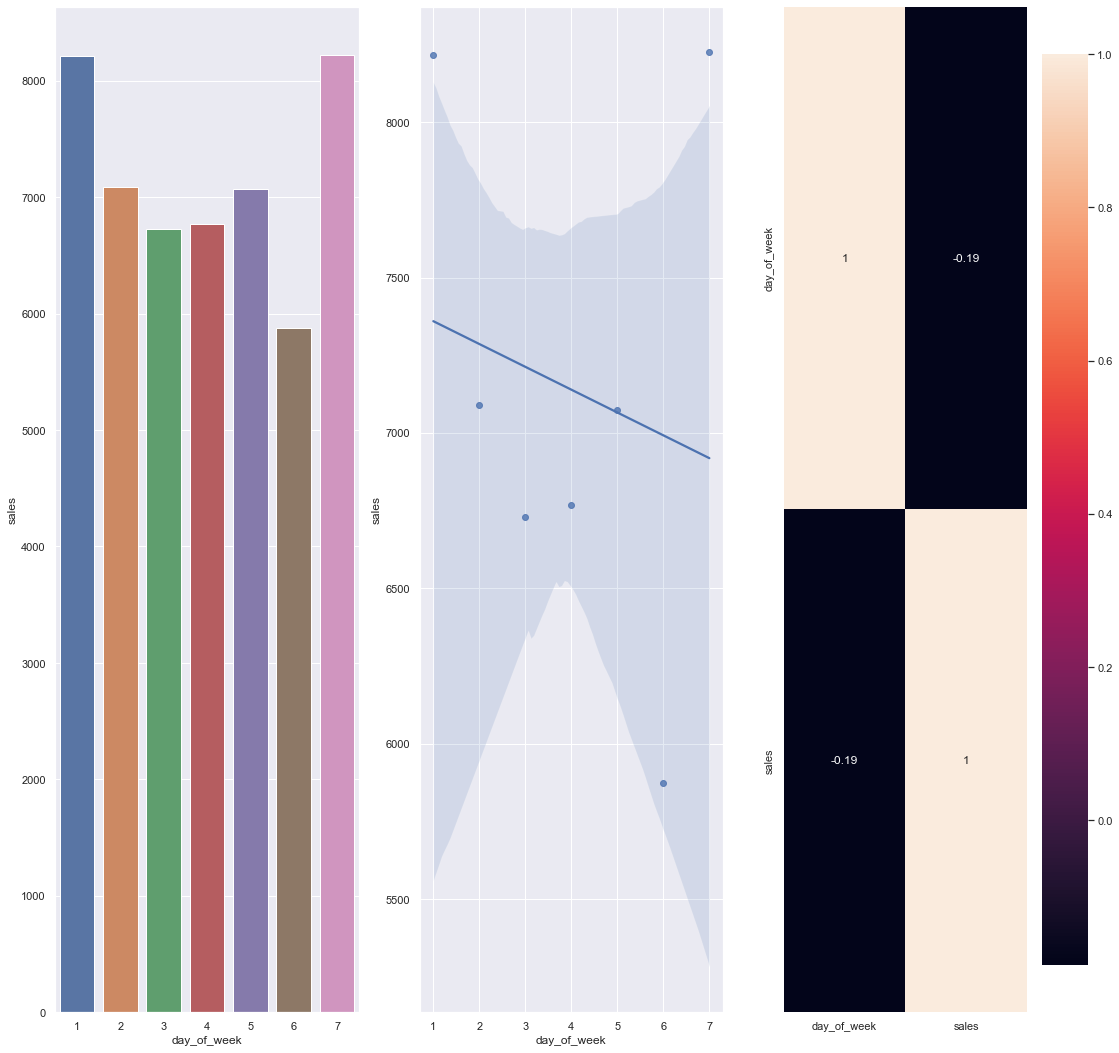

In [50]:
aux1 = df4['weekend']
df4[['day_of_week', 'sales']].groupby( 'day_of_week' ).mean().reset_index()

plt.subplot( 1, 3, 1)
sns.barplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );
plt.gcf().set_size_inches(18.5,18.5)

### H13 Stores should sell less during school holidays.
###  **TRUE** Stores sell less during school holidays, expect on July and August

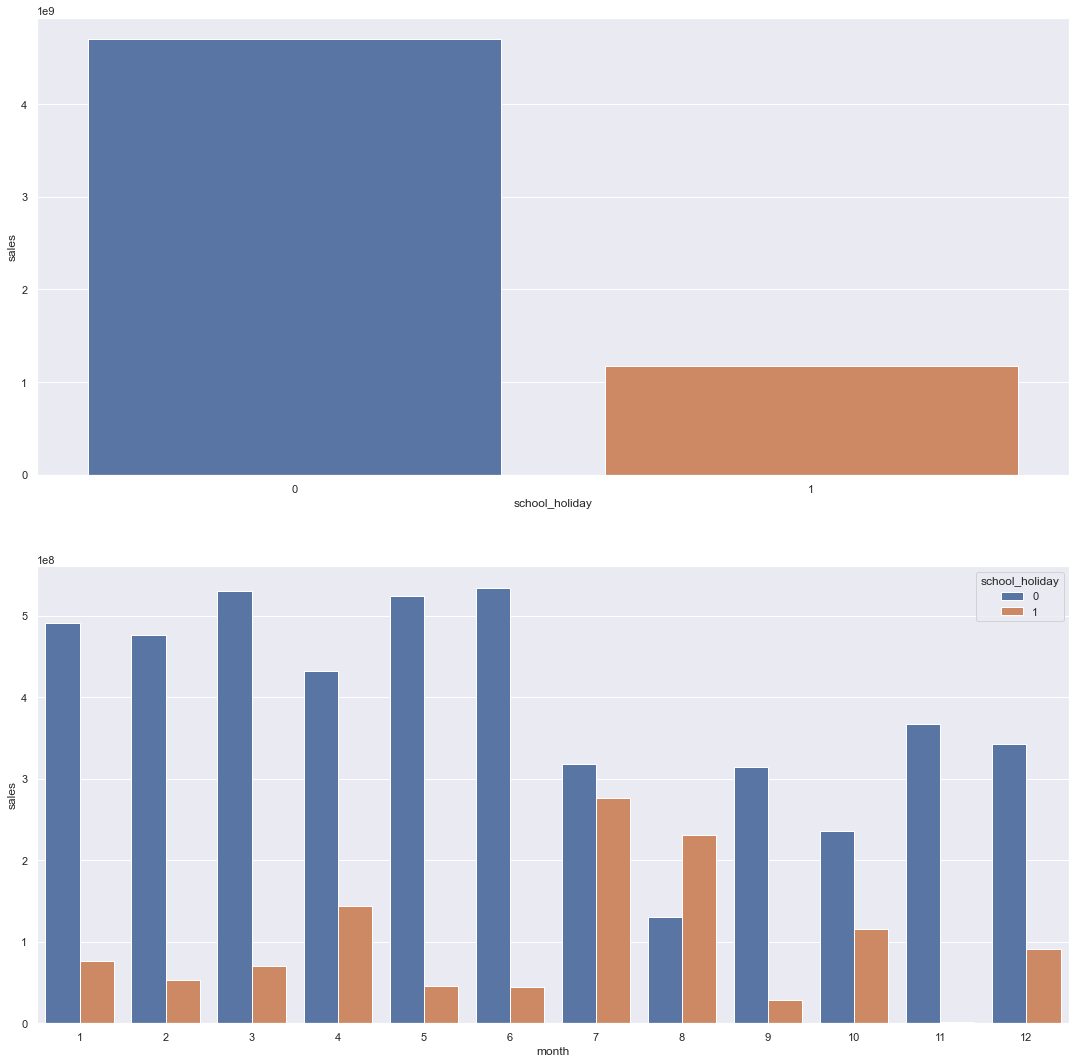

In [42]:
aux1 = df4[['school_holiday', 'sales']].groupby( 'school_holiday' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='school_holiday', y='sales', data=aux1 );

aux2 = df4[['month', 'school_holiday', 'sales']].groupby( ['month','school_holiday'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 );
plt.gcf().set_size_inches(18.5,18.5)

## hypoteses summary

In [48]:
hyp=[
["Stores with larger assortments should SELL MORE.",True,'Low'],
["Stores with closer competitors should SELL LESS.",False,'Medium'],
["Stores with longer competitors should SELL MORE.",False,'Medium'],
["Stores with longer active promotions should SELL MORE.",False,'Low'],
["Stores with more agressive promotions ( bigger discounts)  should SELL MORE ", 'Not tested yet','N/A'],
["Stores with more promotion days should SELL MORE.", 'Not tested yet','N/A'],
["Stores with more consecutive promotions should SELL MORE.",False,'Low'],
["Stores open on the Christmas holiday should SELL MORE.",False,'Medium'],
["Stores should SELL MORE over the years.",False,'High'],
["Stores should SELL MORE in the second half of the year.",False,'High'],
["Stores should SELL MORE after the 10th of each month.",True, 'High'],
["Stores should SELL LESS on weekends.",True, 'High'],
["Stores should SELL LESS during school holidays.",True,'Low']
]
summary=pd.DataFrame(hyp,columns=['Hipothesis', 'Conclusion', "Relevance"])
summary

,Hipothesis,Conclusion,Relevance
0,Stores with larger assortments should SELL MORE.,True,Low
1,Stores with closer competitors should SELL LESS.,False,Medium
2,Stores with longer competitors should SELL MORE.,False,Medium
3,Stores with longer active promotions should SE...,False,Low
4,Stores with more agressive promotions ( bigger...,Not tested yet,N/A
5,Stores with more promotion days should SELL MORE.,Not tested yet,N/A
6,Stores with more consecutive promotions should...,False,Low
7,Stores open on the Christmas holiday should SE...,False,Medium
8,Stores should SELL MORE over the years.,False,High
9,Stores should SELL MORE in the second half of ...,False,High


## 4.3 multivariate analysis

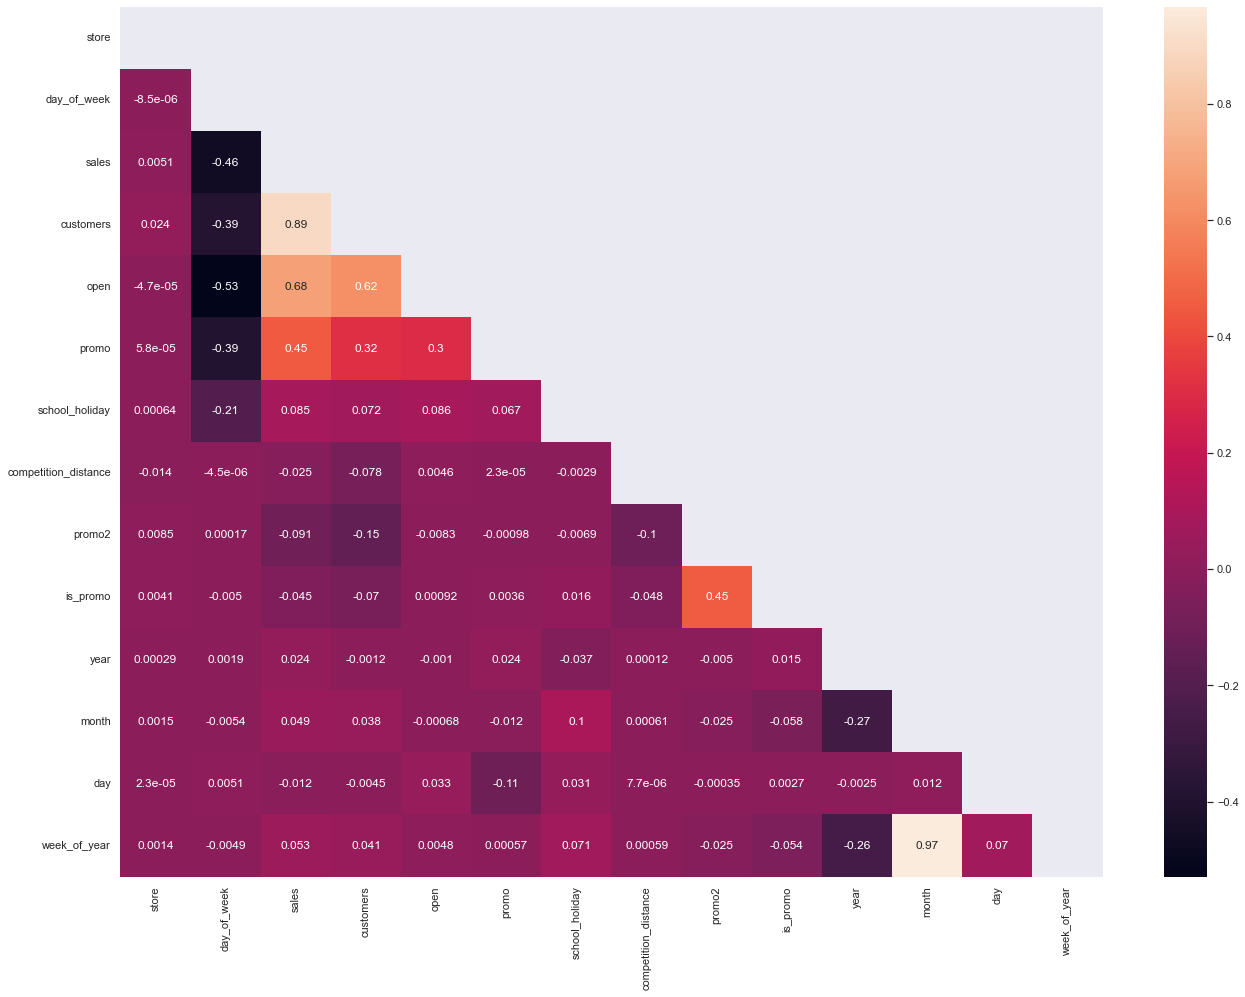

In [44]:
corrs= df2.select_dtypes(include=['float64','int64']).corr(method='pearson')
matrix = np.triu(corrs)
sns.heatmap(corrs,annot=True,mask=matrix)
plt.gcf().set_size_inches(22,16)

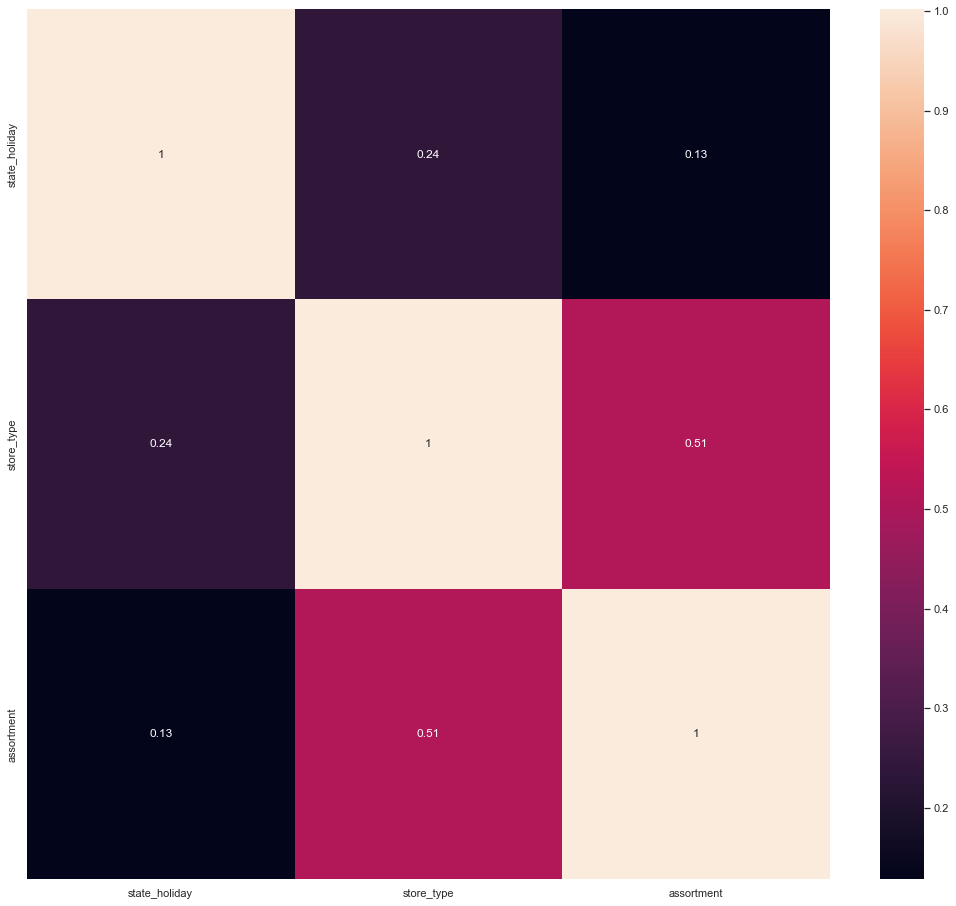

In [45]:
# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 
               'store_type': [a4, a5, a6],
               'assortment': [a7, a8, a9]  })
d = d.set_index( d.columns )

sns.heatmap( d, annot=True )
plt.gcf().set_size_inches(18,16)

# 5.0 DATA PREPARATION

In [23]:
df5=df4.copy()

## 5.1 normalization

## 5.2 rescalling

NameError: name 'df4' is not defined

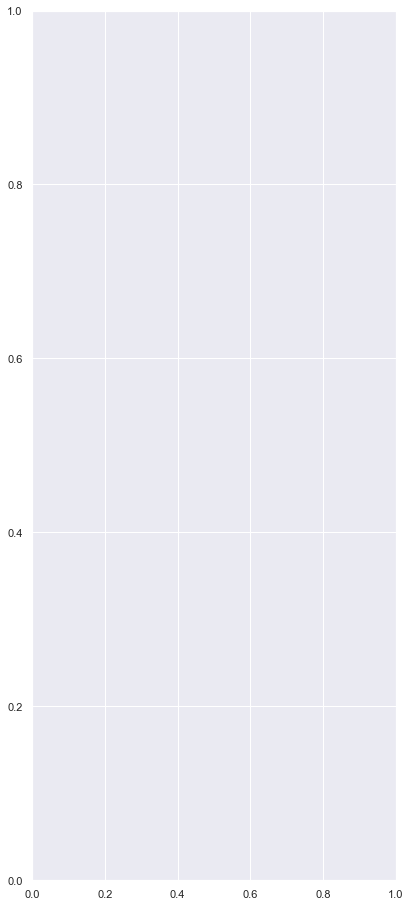

In [14]:
plt.subplot(1,4,1)
sns.boxplot(df4['competition_distance'])
plt.subplot(1,4,2)
sns.boxplot(df4['competition_time_month'])
plt.subplot(1,4,3)
sns.boxplot(df4['promo_time_week'])
plt.subplot(1,4,4)
sns.boxplot(df4['year'])
plt.gcf().set_size_inches(20,10)


In [24]:
rs = RobustScaler()
mms = MinMaxScaler()

os.makedirs("parameters",exist_ok=True)

# competition distance
df5['competition_distance'] = rs.fit_transform( df5[['competition_distance']].values )
pickle.dump( rs, open( 'parameters/competition_distance_scaler.pkl', 'wb') )

# competition time month
df5['competition_time_month'] = rs.fit_transform( df5[['competition_time_month']].values )
pickle.dump( rs, open( 'parameters/competition_time_month_scaler.pkl', 'wb') )

# promo time week
df5['promo_time_week'] = mms.fit_transform( df5[['promo_time_week']].values )
pickle.dump( rs, open( 'parameters/promo_time_week_scaler.pkl', 'wb') )

# year
df5['year'] = mms.fit_transform( df5[['year']].values )
pickle.dump( mms, open( 'parameters/year_scaler.pkl', 'wb') )

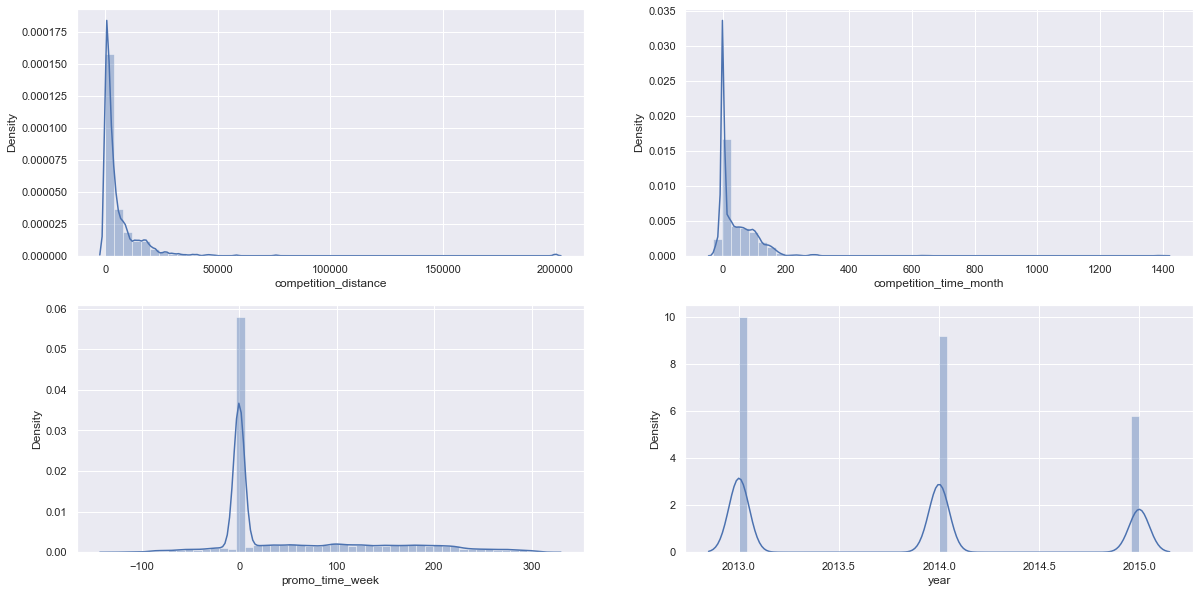

In [ ]:
plt.subplot(2,2,1)
sns.distplot(df4['competition_distance'])
plt.subplot(2,2,2)
sns.distplot(df4['competition_time_month'])
plt.subplot(2,2,3)
sns.distplot(df4['promo_time_week'])
plt.subplot(2,2,4)
sns.distplot(df4['year'])
plt.gcf().set_size_inches(20,10)

## 5.3 encoding

In [25]:
#One Hot Encoding

df5=pd.get_dummies(df5,prefix=['state_holiday'],columns=['state_holiday'])

#LabelEncoder
le=LabelEncoder()
df5['store_type']=le.fit_transform(df5['store_type'])
pickle.dump(le,open("parameters/store_type_scaler.pkl","wb"))

#Ordinal Encoder
assortment_dict = {'basic':1 , "extra": 2, "extended":3}
df5['assortment'] = df5['assortment'].map(assortment_dict)
#pickle.dump(rs,open("parameters/assortment_encoder.pkl","wb"))

df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,2,1,-0.170968,9,2008,0,31,2015,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,6064,1,1,0,1,-0.283871,11,2007,1,13,2010,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,8314,1,1,0,1,1.903226,12,2006,1,14,2011,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,13995,1,1,2,3,-0.275806,9,2009,0,31,2015,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,4822,1,1,0,1,4.448387,4,2015,0,31,2015,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


##  5.4 target variable transformation

In [26]:
df5['sales'] = np.log1p(df5['sales'])

## 5.5 nature transformation

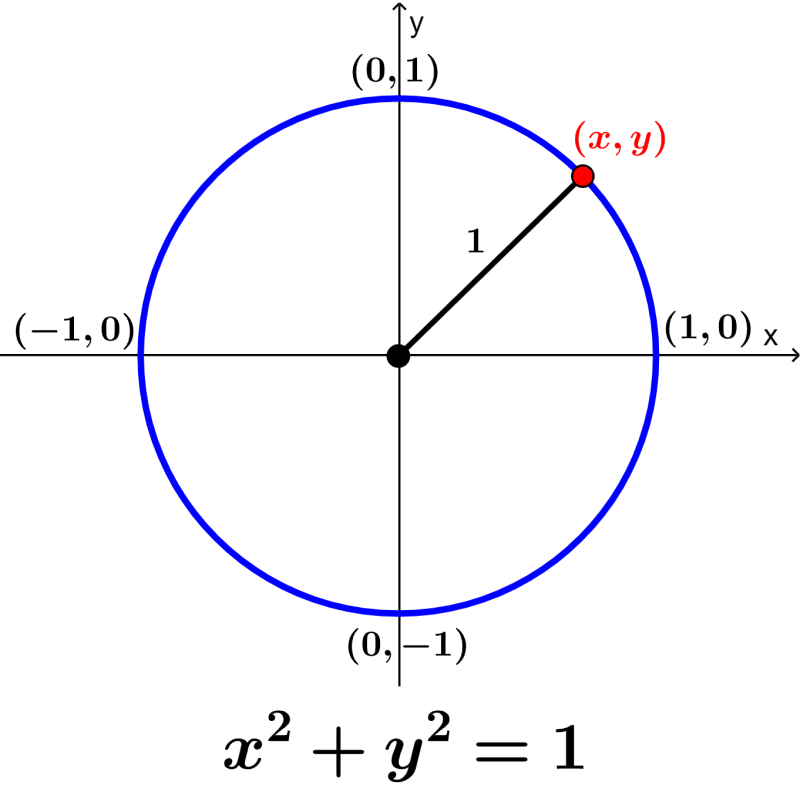

In [5]:
Image('img/trig.png')

In [27]:
# day of week
df5['day_of_week_sin'] = df5['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
df5['day_of_week_cos'] = df5['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# month
df5['month_sin'] = df5['month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
df5['month_cos'] = df5['month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day 
df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
df5['week_of_year_cos'] = df5['week_of_year'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )

# 7.0  FEATURE SELECTION

## 7.1 Split dataframe into training and test dataset

In [28]:
df6=df5.copy()

In [ ]:
# These columns was transformed and assigned to other columns, therefore it won't be used anymore
cols_drop = ['week_of_year', 'day', 'month', 'day_of_week', 'promo_since', 'competition_since', 'year_week']
df6= df6.drop(cols_drop, axis=1)

In [30]:
df6[['store', 'date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta(days=6*7)

Timestamp('2015-06-19 00:00:00')

In [ ]:
#Out-of-time split
train= df6[df6['date']<'2015-06-19']
test = df6[df6['date']>='2015-06-19']

xtrain, ytrain = train.drop(['sales'],axis=1), train['sales']
xtest, ytest = test.drop(['sales'], axis=1), test['sales']

print(f"Train size: {xtrain.shape}, {xtrain['date'].max()} \n",
    f"Test size: {xtest.shape}, {xtest['date'].min()}")

## 7.2 Boruta as Feature Selector

## 7.3 Manual Feature Selection

In [32]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'competition_time_month',
    'promo_time_week',
    'day_of_week_sin',
    'day_of_week_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'week_of_year_sin',
    'week_of_year_cos']
len(cols_selected_boruta)

20

In [33]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'competition_time_month',
    'promo_time_week',
    'day_of_week_sin',
    'day_of_week_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'week_of_year_sin',
    'week_of_year_cos']

# columns to add
feat_to_add = ['date', 'sales']

cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend( feat_to_add )

# 8.0 MACHINE LEARNING MODELLING

In [34]:
xtrain=train[cols_selected_boruta]
xtest=test[cols_selected_boruta]
xtrainfull=train[cols_selected_boruta_full]

## 8.1 Average Model

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


aux1 = xtest.copy()
aux1['sales'] = ytest.copy()

# prediction
aux2 = aux1[['store', 'sales']].groupby( 'store' ).mean().reset_index().rename( columns={'sales': 'predictions'} )
aux1 = pd.merge( aux1, aux2, how='left', on='store' )
ypred_baseline = aux1['predictions']

# performance
baseline_result = errors_ml(aux1['sales'],ypred_baseline,model_name='average_model')
baseline_result

,model_name,mae,mape,mse,rmse
0,average_model,1354.80035,0.20640,3367722.45872,1835.13554


## 8.2 Linear Regression Model

In [ ]:
# model
lr = LinearRegression().fit( xtrain, ytrain )

# prediction
ypred_lr = lr.predict( xtest )

# performance
lr_result = errors_ml(ytest, ypred_lr,model_name=lr.__class__.__name__)
lr_result

,model_name,mae,mape,mse,rmse
0,LinearRegression,1867.08977,0.29269,7134503.90969,2671.04922


## 8.3 Linear Regression Model - Cross Validation

In [ ]:
# model
lrr = Lasso( alpha=0.01 ).fit( xtrain, ytrain )

# prediction
ypred_lrr = lrr.predict( xtest )

# performance
lrr_result = errors_ml(ytest, ypred_lrr,model_name=lrr.__class__.__name__)
lrr_result

,model_name,mae,mape,mse,rmse
0,Lasso,1891.70488,0.28911,7532015.33699,2744.45174


## 8.4 Random Forest Regressor

In [ ]:
# model
rf = RandomForestRegressor(n_estimators=15, n_jobs=-1,  max_depth=25, random_state=42).fit( xtrain, ytrain )

# prediction
ypred_rf = rf.predict( xtest )

# performance
rf_result = errors_ml(ytest, ypred_rf,model_name=rf.__class__.__name__)
rf_result

,model_name,mae,mape,mse,rmse
0,RandomForestRegressor,733.13469,0.10679,1194321.76834,1092.85030


## 8.5 XGBoost Regressor

In [ ]:
# model
model_xgb = xgb.XGBRegressor(colsample_bytree=0.6,gamma=0.3,learning_rate=0.1,max_depth=15,
min_child_weight=3,subsample=0.9,n_estimators=50,eval_metric='rmse',early_stopping_rounds=20,random_state=42).fit( xtrain, ytrain )

# prediction
ypred_xgb = model_xgb.predict( xtest )
# performance
xgb_result = errors_ml(ytest, ypred_xgb,model_name=model_xgb.__class__.__name__)
xgb_result

[05:11:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,model_name,mae,mape,mse,rmse
0,XGBRegressor,940.36205,0.12634,1981111.28621,1407.51955


## 8.6 Compare Models Performance

In [ ]:
modelling_result=pd.concat([baseline_result,lr_result,lrr_result,rf_result,xgb_result])
modelling_result.sort_values("rmse")

,model_name,mae,mape,mse,rmse
0,RandomForestRegressor,733.13469,0.10679,1194321.76834,1092.85030
0,XGBRegressor,940.36205,0.12634,1981111.28621,1407.51955
0,average_model,1354.80035,0.20640,3367722.45872,1835.13554
0,LinearRegression,1867.08977,0.29269,7134503.90969,2671.04922
0,Lasso,1891.70488,0.28911,7532015.33699,2744.45174


## 8.7 Cross Validation

In [37]:
def cross_validation( x_training, kfold, model_name, model, verbose=False ):
    mae_list = []
    mape_list = []
    rmse_list = []
    print(f'training {model_name}')
    for k in reversed( range( 1, kfold+1 ) ):
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation 
        validation_start_date = x_training['date'].max() - datetime.timedelta( days=k*6*7)
        validation_end_date = x_training['date'].max() - datetime.timedelta( days=(k-1)*6*7)

        # filtering dataset
        training = x_training[x_training['date'] < validation_start_date]
        validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]

        # training and validation dataset
        # training
        xtraining = training.drop( ['date', 'sales'], axis=1 ) 
        ytraining = training['sales']

        # validation
        xvalidation = validation.drop( ['date', 'sales'], axis=1 )
        yvalidation = validation['sales']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict( xvalidation )

        # performance
        m_result = errors_ml( yvalidation, yhat, model_name=model_name)




        # store performance of each kfold iteration
        mae_list.append(  m_result['mae'] )
        mape_list.append( m_result['mape'] )
        rmse_list.append( m_result['rmse'] )

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                          'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )

# 8.0 HYPERPARAMETER TUNING

In [ ]:
params = {"colsample_bytree":[ 0.7, 0.9],
"learning_rate": [0.1],
"max_depth":[10,15,20],
"min_child_weight":[2,3,4], 
"subsample": [ 0.7,0.9],
"gamma": [0.3,0.4],
"n_estimators":[50,75],
"eval_metric":['rmse'],
"early_stopping_rounds":[20],
"random_state":[42]}

## 8.1 Final Model

In [41]:
param_tuned = {
'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 4,
 'subsample': 0.7, 'gamma': 0.3, 'n_estimators': 100, 'eval_metric': 'rmse',
 # 'early_stopping_rounds': 20,
  'random_state': 42
        }

In [42]:
# model
model_xgb_tuned = xgb.XGBRegressor( objective='reg:squarederror',
                                    n_estimators=param_tuned['n_estimators'], 
                                    eval_metric=param_tuned['eval_metric'],
                                    learning_rate=param_tuned['learning_rate'],
                                    max_depth=param_tuned['max_depth'], 
                                    subsample=param_tuned['subsample'],
                                    colsample_bytee=param_tuned['colsample_bytree'],
                                    min_child_weight=param_tuned['min_child_weight'],
                                    random_state=param_tuned['random_state'],
                                    gamma=param_tuned['gamma']).fit( xtrain, ytrain )

# prediction
ypred_xgb_tuned = model_xgb_tuned.predict(xtest)

# performance
xgb_result_tuned = errors_ml(ytrue=ytest,ypred=ypred_xgb_tuned,model_name=model_xgb_tuned.__class__.__name__)
xgb_result_tuned

[06:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,model_name,mae,mape,mse,rmse
0,XGBRegressor,860.14753,0.12522,1606809.99428,1267.60009


In [ ]:
def mean_percentage_error (y, ypred):
    return np.mean((y - ypred)/y )

In [ ]:
mpe = mean_absolute_percentage_error( np.expm1 (ytest), np.expm1(ypred_xgb_tuned))
mpe

NameError: name 'ytest' is not defined

# 9.0 ERROR INTERPRETATION TO BUSINESS

In [ ]:
cols_selected_boruta_full

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_sin',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_sin',
 'week_of_year_cos',
 'date',
 'sales']

In [ ]:
df9 = test[cols_selected_boruta_full]

# rescale
df9['sales'] = np.expm1( df9['sales'])
df9['predictions']= np.expm1(ypred_xgb_tuned)
df9.head(1)

NameError: name 'cols_selected_boruta_full' is not defined

## 9.1 business performance

In [ ]:
# sum of predictions
df91 = df9[['store', 'predictions']].groupby( 'store' ).sum().reset_index()

# MAE and MAPE
df9_aux1 = df9[['store', 'sales', 'predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns={0:'MAE'})
df9_aux2 = df9[['store', 'sales', 'predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_percentage_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns={0:'MAPE'})

# Merge
df9_aux3 = pd.merge( df9_aux1, df9_aux2, how='inner', on='store' )
df92 = pd.merge( df91, df9_aux3, how='inner', on='store' )

# Scenarios
df92['worst_scenario'] = df92['predictions'] - df92['MAE']
df92['best_scenario'] = df92['predictions'] + df92['MAE']

# order columns
df92 = df92[['store', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

<AxesSubplot:xlabel='store', ylabel='MAPE'>

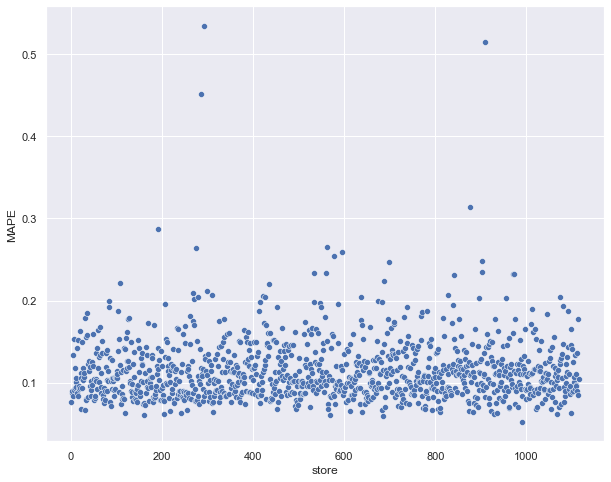

In [ ]:
sns.scatterplot(x='store',y='MAPE',data=df92)

In [ ]:
df92.sort_values( 'MAPE', ascending=False ).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,102837.30469,99522.55777,106152.05160,3314.74692,0.53418
908,909,208463.70312,200388.53460,216538.87165,8075.16852,0.51542
285,286,189815.26562,188372.88003,191257.65122,1442.38559,0.45154
875,876,180474.18750,176157.09301,184791.28199,4317.09449,0.31389
191,192,342641.09375,338712.52832,346569.65918,3928.56543,0.28691


## 9.2 total performance

In [ ]:
df93=df92[['predictions','worst_scenario','best_scenario']].apply(lambda x: np.sum(x),axis=0).reset_index().rename(columns={'index':'Scenario',0:'Values'})
df93['Values']=df93['Values'].map( 'R${:,.2f}'.format )
df93

,Scenario,Values
0,predictions,"R$267,868,336.00"
1,worst_scenario,"R$266,907,597.52"
2,best_scenario,"R$268,829,090.00"


## 9.3 machine learning performance

In [ ]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

NameError: name 'df9' is not defined

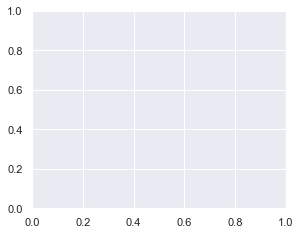

In [ ]:
plt.subplot( 2, 2, 1 )
sns.lineplot( x='date', y='sales', data=df9, label='SALES' )
sns.lineplot( x='date', y='predictions', data=df9, label='PREDICTIONS' )

plt.subplot( 2, 2, 2 )
sns.lineplot( x='date', y='error_rate', data=df9 )
plt.axhline( 1, linestyle='--')

plt.subplot( 2, 2, 3 )
sns.distplot( df9['error'] )

plt.subplot( 2, 2, 4 )
sns.scatterplot( df9['predictions'], df9['error'] )

# 10.0 DEPLOY MODEL TO PRODUCTION

## 10.1 Rossmann class

In [ ]:
import pickle
import inflection
import pandas as pd
import numpy as np
import math
import datetime

class Rossmann( object ):
    def __init__( self ):
        self.home_path='P:\Python\GitHub\forecast_sales'
        self.competition_distance_scaler   = pickle.load( open( self.home_path + '\parameters\competition_distance_scaler.pkl', 'rb') )
        self.competition_time_month_scaler = pickle.load( open( self.home_path + '\parameters\competition_time_month_scaler.pkl', 'rb') )
        self.promo_time_week_scaler        = pickle.load( open( self.home_path + '\parameters\promo_time_week_scaler.pkl', 'rb') )
        self.year_scaler                   = pickle.load( open( self.home_path + '\parameters\year_scaler.pkl', 'rb') )
        self.store_type_scaler             = pickle.load( open( self.home_path + '\parameters\store_type_scaler.pkl', 'rb') )
        
        
    def data_cleaning( self, df1 ): 
        
        ## 1.1. Rename Columns
        cols_old = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                    'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                    'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

        snakecase = lambda x: inflection.underscore( x )

        cols_new = list( map( snakecase, cols_old ) )

        # rename
        df1.columns = cols_new

        ## 1.3. Data Types
        df1['date'] = pd.to_datetime( df1['date'] )

      
        #fillna competition_distance        
        df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

        #competition_open_since_month
        df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

        #competition_open_since_year 
        df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

        #promo2_since_week           
        df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

        #promo2_since_year           
        df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

        #promo_interval              
        month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

        df1['promo_interval'].fillna(0, inplace=True )

        df1['month_map'] = df1['date'].dt.month.map( month_map )

        df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

        # change data type competiton
        df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
        df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

        # change data type promo2
        df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
        df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )
        
        return df1 


    def feature_engineering( self, df2 ):

        # year
        df2['year'] = df2['date'].dt.year

        # month
        df2['month'] = df2['date'].dt.month

        # day
        df2['day'] = df2['date'].dt.day

        # week of year
        df2['week_of_year'] = df2['date'].dt.weekofyear

        # year week
        df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

        # competition since
        df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
        df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

        # promo since
        df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
        df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
        df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

        # assortment
        df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

        # state holiday
        df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

     
        # row filtering
        df2 = df2[df2['open'] != 0]

        # col filtering
        cols_drop = ['open', 'promo_interval', 'month_map']
        df2 = df2.drop( cols_drop, axis=1 )
        
        return df2


    def data_preparation( self, df5 ):

        ## 5.2. Rescaling 
        # competition distance
        df5['competition_distance'] = self.competition_distance_scaler.transform( df5[['competition_distance']].values )
    
        # competition time month
        df5['competition_time_month'] = self.competition_time_month_scaler.transform( df5[['competition_time_month']].values )

        # promo time week
        df5['promo_time_week'] = self.promo_time_week_scaler.transform( df5[['promo_time_week']].values )
        
        # year
        df5['year'] = self.year_scaler.transform( df5[['year']].values )

        ### 5.3.1. Encoding
        # state_holiday - One Hot Encoding
        df5 = pd.get_dummies( df5, prefix=['state_holiday'], columns=['state_holiday'] )

        # store_type - Label Encoding
        df5['store_type'] = self.store_type_scaler.transform( df5['store_type'] )

        # assortment - Ordinal Encoding
        assortment_dict = {'basic': 1,  'extra': 2, 'extended': 3}
        df5['assortment'] = df5['assortment'].map( assortment_dict )

        
        ### 5.3.3. Nature Transformation
        # day of week
        df5['day_of_week_sin'] = df5['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
        df5['day_of_week_cos'] = df5['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

        # month
        df5['month_sin'] = df5['month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
        df5['month_cos'] = df5['month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

        # day 
        df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
        df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

        # week of year
        df5['week_of_year_sin'] = df5['week_of_year'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
        df5['week_of_year_cos'] = df5['week_of_year'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )
        
        
        cols_selected = [ 'store', 'promo', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month',
            'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'competition_time_month', 'promo_time_week',
            'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'week_of_year_sin', 'week_of_year_cos']
        
        return df5[ cols_selected ]
    
    
    def get_prediction( self, model, original_data, test_data ):
        # prediction
        pred = model.predict( test_data )
        
        # join pred into the original data
        original_data['prediction'] = np.expm1( pred )
        
        return original_data.to_json( orient='records', date_format='iso' )

## 10.2 API handler

In [ ]:
import pickle
import pandas as pd
from flask             import Flask, request, Response
from rossmann import rossmann
import inflection

# loading model
model = pickle.load( open(r'P:\\Python\\GitHub\\forecast_sales\\model_xgb_rossmann_v0.pkl', 'rb') )

# initialize API
app = Flask( __name__ )

@app.route( '/rossmann/predict', methods=['POST'] )
def rossmann_predict():
    test_json = request.get_json()
   
    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instantiate Rossmann class
        pipeline = Rossmann()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # data preparation
        df3 = pipeline.data_preparation( df2 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df3 )
        
        return df_response
        
        
    else:
        return Response( '{}', status=200, mimetype='application/json' )

if __name__ == '__main__':
    app.run( '0.0.0.0' )

ModuleNotFoundError: No module named 'rossmann'

## 10.3 API tester

In [44]:
#loading test dataset
df10=pd.read_csv(r"data/test.csv")
df10.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.00000,1,0,0
1,2,3,4,2015-09-17,1.00000,1,0,0
2,3,7,4,2015-09-17,1.00000,1,0,0
3,4,8,4,2015-09-17,1.00000,1,0,0
4,5,9,4,2015-09-17,1.00000,1,0,0


In [45]:
# merge test dataset +store
df_test=df10.merge(store,how='left',on='Store')

#choose store for prediction
df_test = df_test[df_test['Store'] == 22]

#remove closed days
df_test=df_test[(df_test['Open']!=0) & (~df_test['Open'].isnull())]


In [46]:
df_test.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
15,16,22,4,2015-09-17,1.00000,1,0,0,a,a,1040.00000,NaN,NaN,1,22.00000,2012.00000,"Jan,Apr,Jul,Oct"


In [47]:
len(df_test.columns)

17

In [48]:
# convert Dataframe to json
import json
import requests
data = json.dumps(df_test.to_dict(orient='records'))

In [61]:
#API Call
url = 'http://192.168.1.10:5000/rossmann/predict'
#url = 'https://rossman-model-kos.herokuapp.com/rossmann/rossmann/predict'
data=data

header = {'Content-type':  'application/json','debug':'True'}

r=requests.post(url, data, headers=header)
print( f'Status Code {r.status_code}')

Status Code 503


In [ ]:
d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys())

In [ ]:
d1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,prediction
0,16,22,4,2015-09-17,1.0,1,0,0,a,a,1040.0,None,None,1,22.0,2012.0,"Jan,Apr,Jul,Oct",4674.521973
1,872,22,3,2015-09-16,1.0,1,0,0,a,a,1040.0,None,None,1,22.0,2012.0,"Jan,Apr,Jul,Oct",4385.039062
2,1728,22,2,2015-09-15,1.0,1,0,0,a,a,1040.0,None,None,1,22.0,2012.0,"Jan,Apr,Jul,Oct",5403.807617
3,2584,22,1,2015-09-14,1.0,1,0,1,a,a,1040.0,None,None,1,22.0,2012.0,"Jan,Apr,Jul,Oct",6495.707520
4,4296,22,6,2015-09-12,1.0,0,0,0,a,a,1040.0,None,None,1,22.0,2012.0,"Jan,Apr,Jul,Oct",3049.921875


In [ ]:
d2 = d1[['Store', 'prediction']].groupby( 'Store' ).sum().reset_index()

for i in range( len( d2 ) ):
    print( 'Store Number {} will sell R${:,.2f} in the next 6 weeks'.format( 
            d2.loc[i, 'Store'], 
            d2.loc[i, 'prediction'] ) )

Store Number 22 will sell R$174,469.19 in the next 6 weeks
